In [1]:
import numpy as np
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.stats as st     
import statsmodels.api as sm 
import seaborn as sns

In [76]:
import warnings; warnings.filterwarnings("ignore")



In [30]:
import pandas as pd

data = pd.read_csv('BaseDatos.csv')

data.set_index('Date', inplace=True)
data.head()

,Week,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
27/12/2015,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
20/12/2015,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
13/12/2015,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
06/12/2015,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
29/11/2015,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [18]:
data.drop(["Total Bags", "Large Bags","XLarge Bags", 'type', 'year'], axis = 1, inplace = True) 

In [19]:
data = data.rename(columns={'4225':'Large Hass','4046':'Small Hass', '4770':'Extra Large Hass'})
data.head()

,Week,AveragePrice,Total Volume,Small Hass,Large Hass,Extra Large Hass,Small Bags,region
Date,,,,,,,,
27/12/2015,0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,Albany
20/12/2015,1,1.35,54876.98,674.28,44638.81,58.33,9408.07,Albany
13/12/2015,2,0.93,118220.22,794.70,109149.67,130.50,8042.21,Albany
06/12/2015,3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,Albany
29/11/2015,4,1.28,51039.60,941.48,43838.39,75.78,5986.26,Albany


In [12]:
def kde_scipy_1(x,bandwidth=1, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return lambda x_grid: kde.evaluate(x_grid)

def kde_scipy_2(x,bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return lambda x_grid: kde.evaluate(x_grid)

In [6]:
def acep_rechazo(f:'función objetivo a generar',
                 max_f:'maximo de la funcion',
                 N: 'numero de variables aleatorias distribuidas a generar',
                 b: 'Entero máximo del vector x',
                 n: 'Salto del vector en R2'):
    X = np.zeros(N)
    i = 0 
    while i < N:
        R2 = np.random.uniform(0,max_f) 
        R1 = np.random.uniform(0,b,n)

        if R2 < f(R1):
            X[i] = R1
            i+=1
    return X

In [117]:
def muestreo_est(B: 'Número de estratos'):
    u= np.random.uniform(B) 
    i=np.arange(0,B) 
    v = (u+i)/B 
    return v 


def Gen_distr_discreta_(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y

def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, label=label)
    plt.legend()
    plt.show()


# Nodo 3 Bolsas tipo small 

In [56]:
bolsa_small = data['Small Bags']

In [65]:
def elimina_ceros(original):
    nueva = []
    for dato in original:
        if dato != 0:
            nueva.append(dato)
    return nueva


In [66]:
bolsas_new = elimina_ceros(bolsa_small)

In [67]:
bolsas_log = np.log(bolsas_new)

In [62]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(np.array(bolsa_small)[:, None])
print(grid.best_params_)

{'bandwidth': 1.0}


C:\Users\DELL  LATITUDE\Documents\Simulacion\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


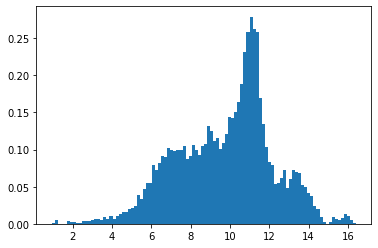

In [55]:
plt.hist(bolsas_log,bins = 100, density = True)
plt.show()

In [68]:
small = kde_scipy_1(bolsas_log) 
small

<function __main__.kde_scipy_1.<locals>.<lambda>(x_grid)>

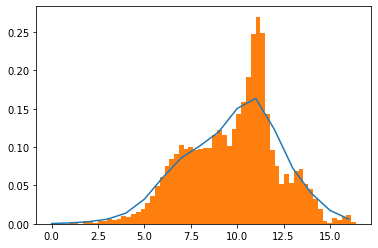

In [71]:
x_small = np.arange(0,max(bolsas_log),1)
plt.figure()
plt.plot(x_small,small(x_small));
plt.hist(bolsas_log,bins = 60, density = True);
plt.show()

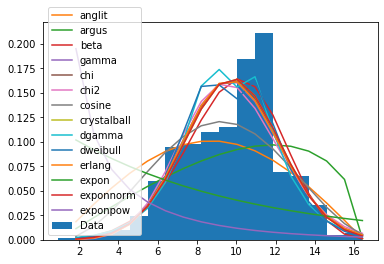

In [92]:
y, x ,_ = plt.hist(bolsas_log, bins=17, density=True, label='Data')
x = x[1:]

dist = [d for d in dir(st) if isinstance(getattr(st,d), getattr(st, 'rv_continuous'))]
dist = dist[1:2] + dist[3:5] + ['gamma'] + dist[10:20]
error = pd.DataFrame(index=dist, columns=['error'])

for d in dist:
    params= getattr(st,d).fit(bolsas_log)
    y_hat = getattr(st, d)(*params).pdf(x)
    error.loc[d]= ((y-y_hat)**2).mean()
    plt.plot(x,y_hat, label=d)
    
plt.legend()
plt.show()

In [94]:
#Calculamos el error del KDE
error_k=((y-small(x_small))**2).mean()
error_k

0.0005233150446230551

In [93]:
error.sort_values('error')


,error
beta,0.000797824
dweibull,0.00099999
crystalball,0.00103372
exponnorm,0.00103378
chi,0.0010846
erlang,0.00111696
gamma,0.00112982
dgamma,0.00122694
chi2,0.00124112
cosine,0.00152533


In [95]:
params = st.beta.fit(x)

pi = st.beta.pdf(x,*params)
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, y)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(y, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = 20-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)

Valor de chi cuadrado teorico  =  39.26975881473578
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=39.26975881473578, pvalue=0.0009942152652475246)
Estadístico de chi_cuadrado =  27.58711163827534


### Se rechaza $H_o$ ya que el valor de $p_{value}$ es pequeño

## Quantil-Quantil

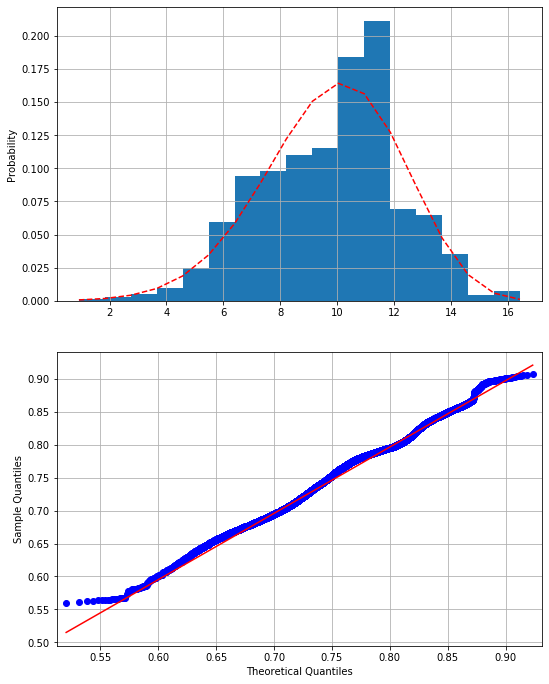

In [97]:
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(bolsas_log, bins=17, density=True, label='Histograma mediciones')
dist = 'beta'
params = getattr(st, dist).fit(bolsas_log)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()

grap1 = sm.qqplot(bolsas_log, dist=getattr(st, dist), line='q', fit=True, ax=ax[1])
ax[1].grid()

#### Se rechaza $H_o$ ya que al realizar la prueba cuantil-cuantil podemos ver como es que los datos no se ajustan completamente.


#### Debido a que se rechazó la distribución beta, procedemos a realizar la distribución por medio de kernel.

### Distribución por Kernel

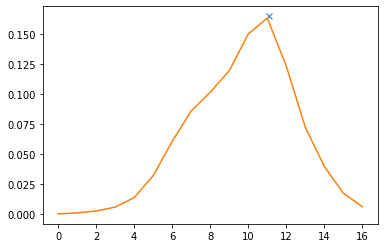

In [107]:
f = small  #Definimos Kernel como f
x = np.arange(0,max(bolsas_log),1) #Definimos el vector en el rango de las ventas

max_volumen = f(optimize.fmin(lambda x:-f(x),0,disp=False)) #Calculamos el valor máximo de la función

#Graficamos el punto máximo con el kernel
plt.plot(11.1,max_volumen,'x',lw = 50)

plt.plot(x,f(x))

In [108]:
np.random.seed(123)
N = 1000 # numero de variables que distribuyen como f a generar

# Usar func anteriormente definida como acep_rechazo_aleatorias que genera variables aleatorias
aleatorias_monte_ventas = acep_rechazo(f,max_volumen,N,17,1)

In [110]:
#Calculo de medias para montecarlo en escala logarítmica y escala real
media_monte_bolsas_l = aleatorias_monte_ventas.mean()
media_monte_bolsas_r = np.exp(media_monte_ventas_l)

#Calculo de medias reales en escala logarítmica y escala real
media_bolsas_log= bolsas_log.mean()
media_bolsas_r= np.exp(bolsas_log.mean())

In [111]:
nodo3_medias= pd.DataFrame(index=['Medias'] , columns=['Montecarlo logarítmico', 'Real logarítmico',
                                                     'Montecarlo', 'Real'])
nodo3_medias['Montecarlo logarítmico'] = media_monte_bolsas_l
nodo3_medias['Real logarítmico'] = media_bolsas_log
nodo3_medias['Montecarlo'] =  media_monte_bolsas_r
nodo3_medias['Real'] = media_bolsas_r

nodo3_medias

,Montecarlo logarítmico,Real logarítmico,Montecarlo,Real
Medias,9.784428,9.782081,17755.097196,17713.481994


### Cambiar aleatorios_monte_ventas por aleatorios_monte_bolsas

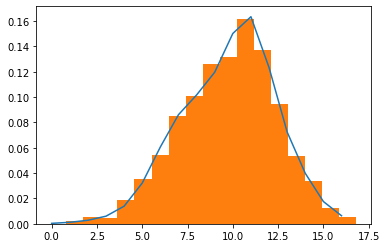

In [112]:
x_bolsas = np.arange(0,max(bolsas_log),1)
plt.figure()
plt.plot(x,f(x))
plt.hist(aleatorias_monte_ventas, bins = 17, density = True)
plt.show()

## Cambiar datos del print

In [113]:
np.random.seed(123)

# Nivel de confianza
confianza = 0.95
X = aleatorias_monte_ventas

i1 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))

media_bolsas = np.mean(X)


print('Con una confianza de %2.2f la media del volumen total de ventas por montecarlo '
      'crudo  estará en el intervalo t normal,\n %s' %(confianza,i1))
print('Media calculada por montecarlo crudo del volumen total de ventas' ,media_bolsas)

error_nodo3 = abs(np.array(bolsas_log.mean() - media_bolsas)/media_bolsas)
porcentaje=error_nodo3*100
print('El porcentaje de error entre la media real y la media estimada con montecarlo fue de', round(porcentaje,2),'%')

Con una confianza de 0.95 la media del volumen total de ventas por montecarlo crudo  estará en el intervalo t normal,
 (9.620510611805024, 9.948345227504888)
Media calculada por montecarlo crudo del volumen total de ventas 9.784427919654956
El porcentaje de error entre la media real y la media estimada con montecarlo fue de 0.02 %


In [115]:
i2 = np.exp(st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X)))

print('Con una confianza de %2.2f la media del volumen total de ventas por montecarlo '
      'crudo  estará en el intervalo t normal,\n %s' %(confianza,i2))
print('Media calculada por montecarlo crudo del volumen total de ventas' ,np.exp(media_bolsas))

error_nodo3 = abs(np.array(np.exp(bolsas_log.mean()) - np.exp(media_bolsas))/(np.exp(media_bolsas)))
porcentaje=error_nodo3*100
print('El porcentaje de error entre la media real y la media estimada con montecarlo fue de', round(porcentaje,2),'%')

Con una confianza de 0.95 la media del volumen total de ventas por montecarlo crudo  estará en el intervalo t normal,
 [15070.74327351 20917.5798911 ]
Media calculada por montecarlo crudo del volumen total de ventas 17755.0971960678
El porcentaje de error entre la media real y la media estimada con montecarlo fue de 0.23 %


## Montecarlo con reducción de varianza

In [118]:
np.random.seed(123)
#Estratificado
N = 1000
u = muestreo_est(N)
funcion3 = lambda u: acep_rechazo(f,max_volumen,N,17,1)
media3 = np.mean(funcion3(u))
media3

9.95548399145744

### Intervalo de Confianza y Error Porcentual

Calculamos intervalo de confianzas y de error porcentual sobre el método estratificado

In [120]:
np.random.seed(123)

# Nivel de confianza
confianza = 0.95
X = funcion3(u)

i1 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))

media_bolsas = media3


print('Con una confianza de %2.2f la media del volumen total de ventas por estratificado estará en el intervalo t normal,\n %s' %(confianza,i1))
print('Media calculada por estratificado del volumen total de ventas' ,media_bolsas)

error_nodo3 = abs(np.array(bolsas_log.mean() - media_bolsas)/media_bolsas)
porcentaje=error_nodo3*100
print('El porcentaje de error entre la media real y la media estimada por estratificado fue de', round(porcentaje,2),'%')

Con una confianza de 0.95 la media del volumen total de ventas por estratificado estará en el intervalo t normal,
 (9.620510611805024, 9.948345227504888)
Media calculada por estratificado del volumen total de ventas 9.95548399145744
El porcentaje de error entre la media real y la media estimada por estratificado fue de 1.74 %


# Nodo 4 Región de estudio

In [201]:
data4 = pd.read_csv('BaseDatos.csv')

data4.set_index('region', inplace=True)
data4.head()

,Week,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
region,,,,,,,,,,,,,
Albany,0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015
Albany,1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015
Albany,2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015
Albany,3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015
Albany,4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015


In [202]:
data4.drop(['Date','AveragePrice', '4046', '4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year'], axis = 1, inplace = True) 

In [204]:
data4

,Week,Total Volume
region,,
Albany,0,64236.62
Albany,1,54876.98
Albany,2,118220.22
Albany,3,78992.15
Albany,4,51039.60
Albany,5,55979.78
Albany,6,83453.76
Albany,7,109428.33
Albany,8,99811.42


In [210]:
def suma(original):
    nueva = []
    for dato in original:
        if dato == 'West':
            nueva.append(dato)
    return sum(nueva)

In [239]:
df = data4.loc[['West'],['Total Volume']]
sum(df['Total Volume'])

1086779155.7499993

In [241]:
df2 = data4.loc[['WestTexNewMexico'],['Total Volume']]
sum(df2['Total Volume'])

144521839.78

In [244]:
df3 = data4.loc[['Albany'],['Total Volume']]
sum(df3['Total Volume'])

16067799.96999999

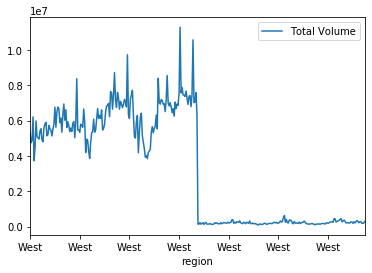

In [242]:
df.plot()

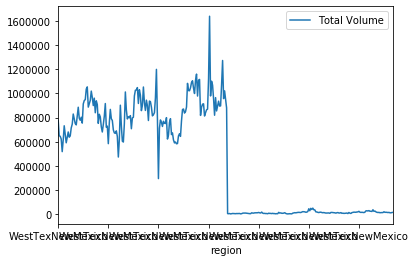

In [243]:
df2.plot()

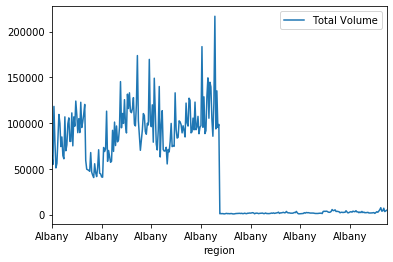

In [245]:
df3.plot()